<a href="https://colab.research.google.com/github/TheJojoJoseph/SNA_QA_24.ipynb/blob/main/Major_Question_Paper_g23ai2100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Major Question Paper for PGD

### The exam is of 3 Hrs and 40 Marks. Needs to finish all these tasks by 3 Hrs and submit the Notebook file through Moodle platform

#### Do not use AI assistance for the exam. You may utilize internet (including stack overflow), notes, past codes that you wrote. Any form of collaboration is not allowed.

#### Screen sharing is not required as it may revale your code to other students.

-----

### You are provided with one csv file. This file is the following-followers graph of our Connect.sonaa.in. The file has 4 columns

- src_node : The node following
- dst_node : The node is being followd
- src_space_id: Space membership of src node
- dst_space_id: Space membership of dst node

**Note that their may be resiprocal edges. If there is a resiprocal edges, it indicates frinedship relation. For example: node 1 -> 11 as well as 11 -> 1 indicates that node 1 and 11 are friend. On the other hand if an edge is found 4 -> 11 but the reverse data is not available indicate that node 4 follows 11 but the node 11 do not follow back to 4.**

Space 3 is your course CSL7390 and Space 4 is the other course I teach CSL7870. The other spaces are for my research teams. Based on this data perform the following activity.

## Question A:

1. Load the data as directed graph. [2 marks]
2. Draw the graph. [3 marks]
3. Draw the degree distribution for in-degree and out-degree separately. [5 marks]

In [11]:
# Loading
# Ans: QA1. Load the data as directed graph. [2 marks]

from google.colab import files
uploaded = files.upload()


import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_csv('all_26092024.csv')
print(data.head())

Saving all_26092024.csv to all_26092024 (5).csv
   src_node  dst_node  src_space_id  dst_space_id
0        11         1             1             1
1        11         1             2             1
2        23         1             3             1
3        23         1             1             1
4       101         1             1             1


In [12]:
G = nx.DiGraph()

# Add edges( Columns name for ref data. src_node  dst_node  src_space_id  dst_space_id )
for _, row in data.iterrows():
    G.add_edge(row['src_node'], row['dst_node'])
print(f"Edges_Count: {G.number_of_edges()}")
print(f"Nodes_Count: {G.number_of_nodes()}")

Edges_Count: 681
Nodes_Count: 131


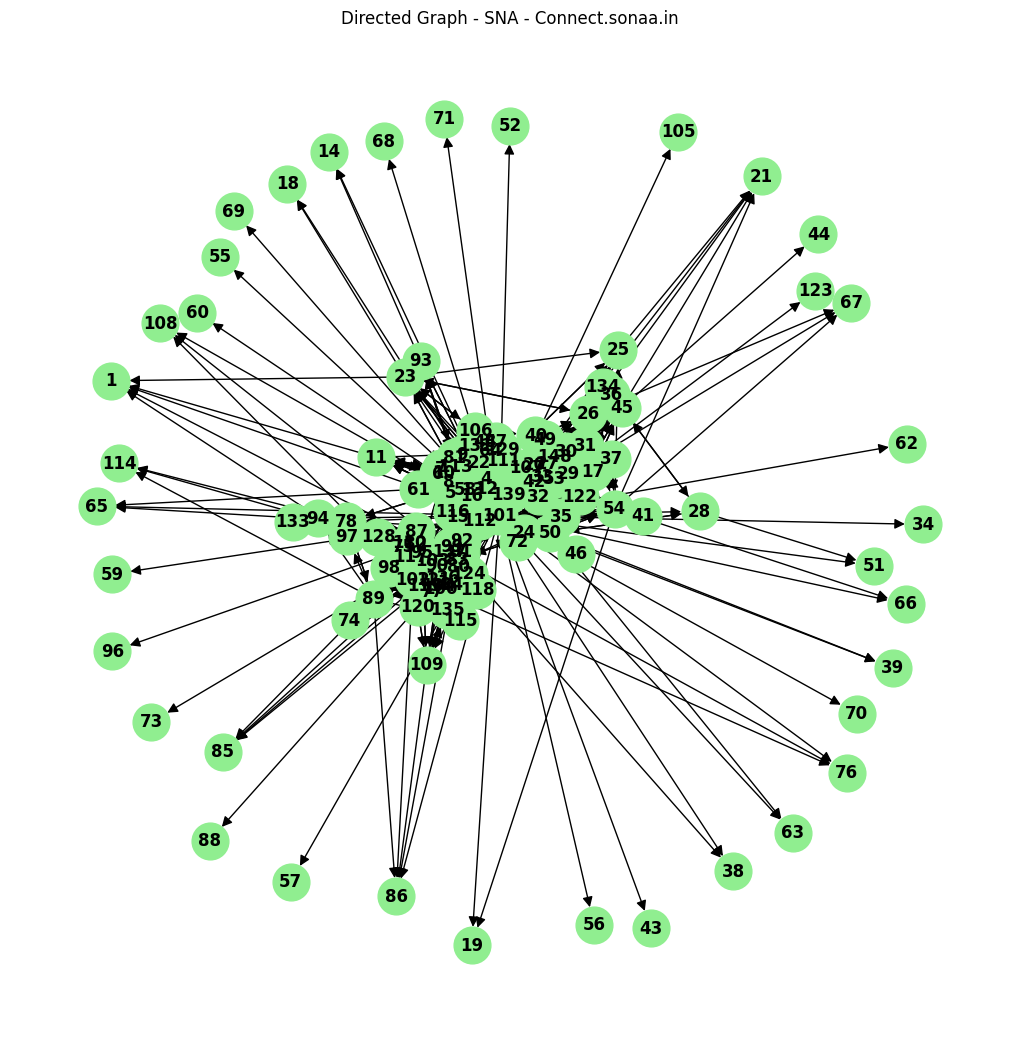

In [14]:
# Drawing
# Ans: QA2. Draw the graph. [3 marks]
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', arrowsize=15)
plt.title("Directed Graph - SNA - Connect.sonaa.in")
plt.show()

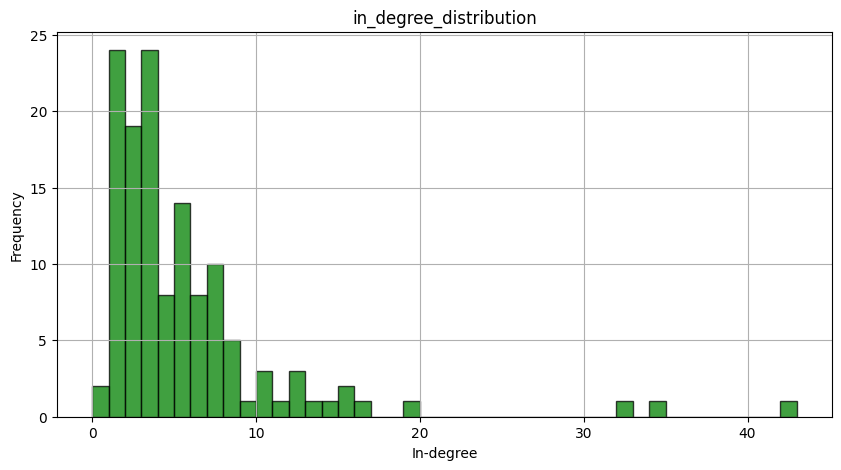

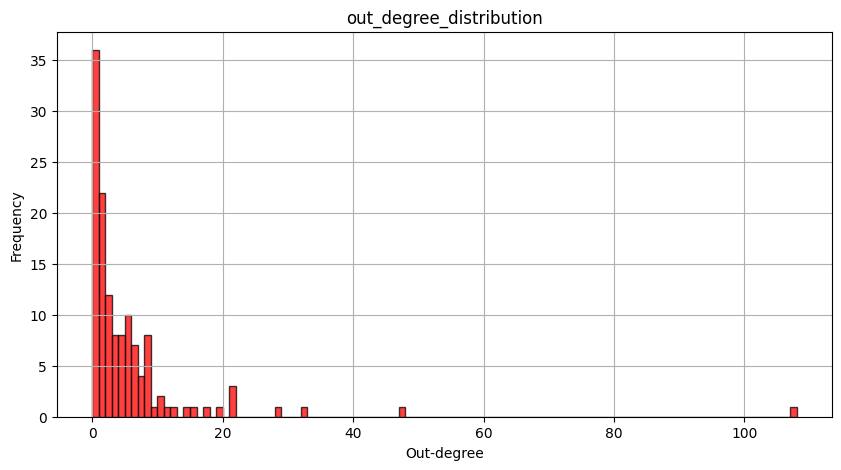

In [15]:
# Degree distribution
# Ans: QA3. Draw the degree distribution for in-degree and out-degree separately. [5 marks]
in_degrees = [d for _, d in G.in_degree()]
out_degrees = [d for _, d in G.out_degree()]

def plot_degree_distribution(degrees, title, xlabel, color):
    plt.figure(figsize=(10, 5))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), alpha=0.75, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

plot_degree_distribution(in_degrees, "in_degree_distribution", "In-degree", "green")
plot_degree_distribution(out_degrees, "out_degree_distribution", "Out-degree", "red")

## Question B:

1. How many strongly connected components are there? [1 marks]
2. Remove all nodes and edges that are not part of any strongly connected components. [4 marks]
3. Draw the graph after node+edge removal. [3 marks]
4. Is this graph connected? If not, how many components are there? [2 marks]

In [20]:
# SCC
# Ans: QB1 How many strongly connected components are there? [1 marks]
# Approch - using networkx inbuild method.
print(f"Count of strongly connected components: {len(list(nx.strongly_connected_components(G)))}")

Count of strongly connected components: 39


In [21]:
# Removal
# Ans: QB2 Remove all nodes and edges that are not part of any strongly connected components. [4 marks]
# Approch - Create a new graph which only nodes of SCC.  (if len(component) > 1)
scc_subgraph_nodes_connected = {node for component in scc for node in component if len(component) > 1}
G_scc_new = G.subgraph(scc_subgraph_nodes_connected).copy()
print(f"Edges_Count: {G_scc_new.number_of_edges()}")
print(f"Nodes_Count: {G_scc_new.number_of_nodes()}")

Edges_Count: 610
Nodes_Count: 93


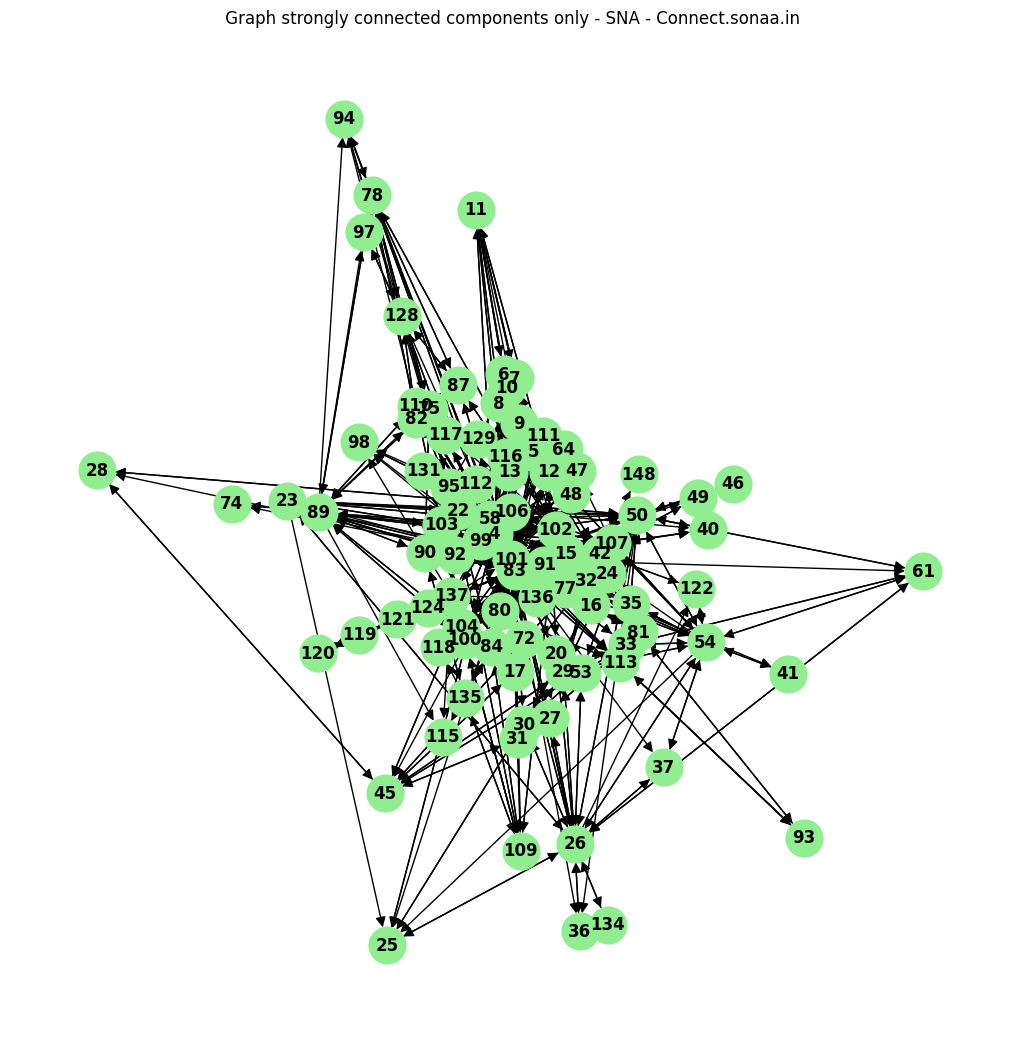

In [23]:
# Ans: QB3 Draw the graph after node+edge removal. [3 marks]
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G_scc_new, pos, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', arrowsize=15)
plt.title(" Graph strongly connected components only - SNA - Connect.sonaa.in")
plt.show()

In [28]:
# Connectedness
# Ans: QB4 Is this graph connected? If not, how many components are there? [2 marks]
# Approch - Check if strongly connected (ibuild method :is_strongly_connected ) else components count (inbuild method :number_strongly_connected_components )
is_connected = nx.is_strongly_connected(G_scc_new)
print(f"Graph-strongly connected: {is_connected}")
num_components = nx.number_strongly_connected_components(G_scc_new)
print(f"No of strongly connected-componets: {num_components}")
if not is_connected:
    num_components = nx.number_weakly_connected_components(G_scc_new)
    print(f"No of weakly connected components: {num_components}")

Graph-strongly connected: True
No of strongly connected-componets: 1


## Question C:

1. Load the graph with only friendship relationship as undirected graph. **Note that friendship relations are those which has resiprocal links. You should not load any edge that is not having any resiprocal edges in the given data set.** [2 marks]
2. Draw the new graph. [2 marks]
3. Draw the degree distribution. [1 marks]

In [29]:
# Loading
# Ans: QC1 Load the graph with only friendship relationship as undirected graph. Note that friendship relations are those which has resiprocal links. You should not load any edge that is not having any resiprocal edges in the given data set. [2 marks]
# Approch - Create a undirected graph , check for reciprocal edge and load data)

new_friendship_graph = nx.Graph()
for _, row in data.iterrows():
    src = row['src_node']
    dst = row['dst_node']
    if (dst, src) in G.edges(): # check reciprocal edge
        new_friendship_graph.add_edge(src, dst)
print(f"Edges_Count: {new_friendship_graph.number_of_edges()}")
print(f"Nodes_Count: {new_friendship_graph.number_of_nodes()}")

Edges_Count: 266
Nodes_Count: 93


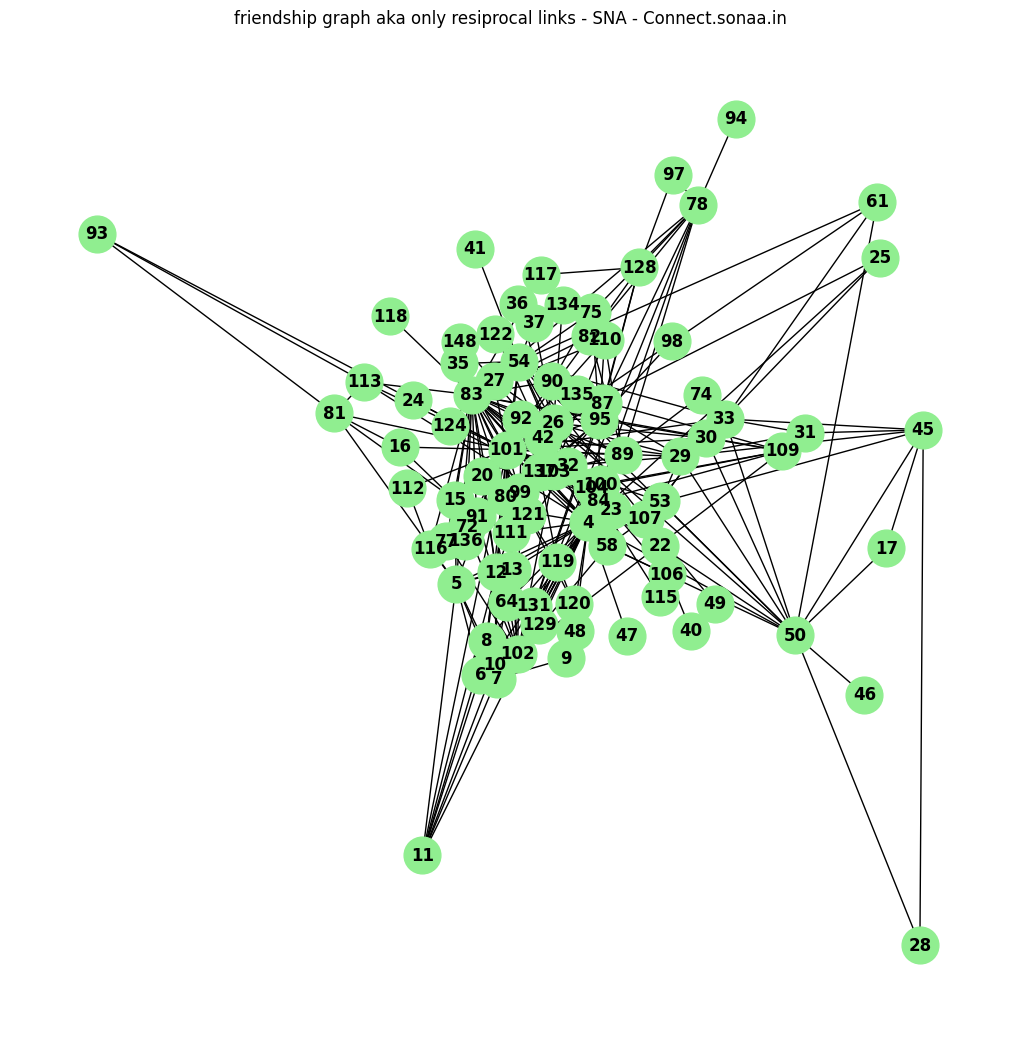

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [31]:
# Drawing
# Ans: QC2 Draw the new graph. [2 marks]
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(new_friendship_graph, pos, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', arrowsize=15)
plt.title("friendship graph aka only resiprocal links - SNA - Connect.sonaa.in")
plt.show()
plt.figure(figsize=(10, 10))

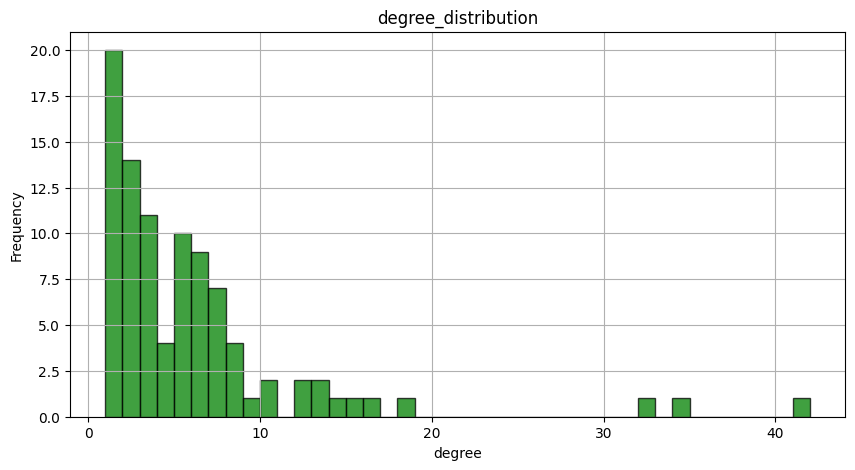

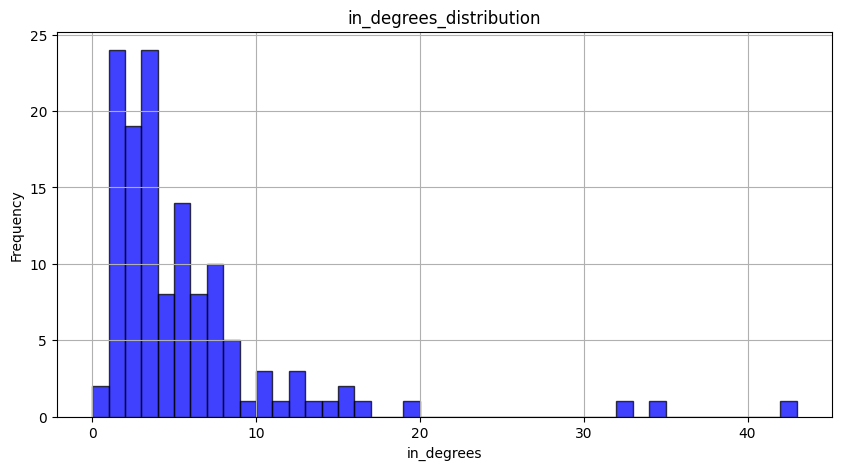

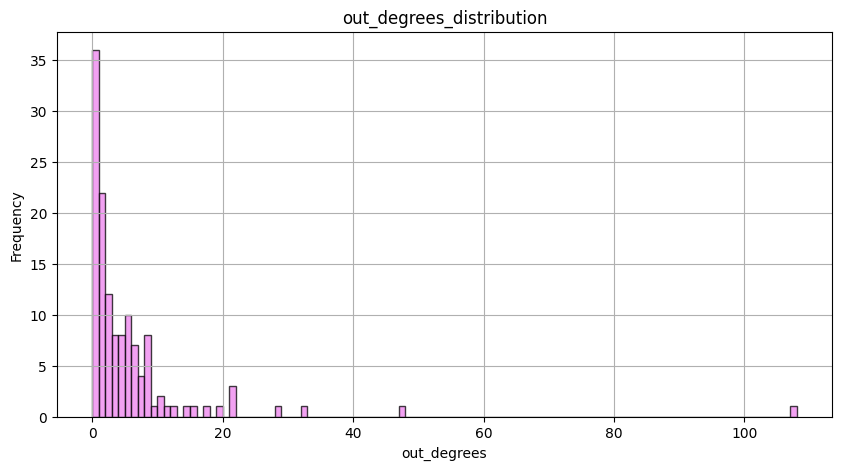

In [34]:
# Degree distribution
# Ans: QC3 Draw the degree distribution. [1 marks]
# Approch - common method written earlier(plot_degree_distribution)
# Get degree distribution of the undirected graph
degrees = [d for _, d in new_friendship_graph.degree()]
in_degrees = [d for _, d in G.in_degree()]
out_degrees = [d for _, d in G.out_degree()]
plot_degree_distribution(degrees, "degree_distribution", "degree", "violet")
plot_degree_distribution(in_degrees, "in_degrees_distribution", "in_degrees", "blue")
plot_degree_distribution(out_degrees, "out_degrees_distribution", "out_degrees", "violet")

## Question D:

1. With the friends graph generated in the previous step, find all the pair of nodes which has distance 2 hop but no direct connections. [2 marks]
2. For all these pair of nodes calculate Jacard Coefficient, Preferential attachment score, Adamic-Adar Index, and resource allocation index. [2 marks]
3. Rank the pairs based on the index scores calculated. [2 marks]
4. 5 separate ranks will be there. Top (highest score) are the predicted links. Analyze the differences in the top 10 predicted links by different methods. Discuss your findings. [4 marks]

In [36]:
# pair finding
# Ans: QD1 With the friends graph generated in the previous step, find all the pair of nodes which has distance 2 hop but no direct connections. [2 marks]
# Approch - find pairs of nodes ie 2-hop distance && not direct edge b/w them
two_hop_pairs = set()
for node in new_friendship_graph.nodes():
    neighbors = set(new_friendship_graph.neighbors(node)) # <-- 2-hop connections
    for neighbor in neighbors:
        second_hop_neighbors = { second_hop for second_hop in new_friendship_graph.neighbors(neighbor) if second_hop not in neighbors and second_hop != node } # <-- not directly connected
        for second_hop in second_hop_neighbors:
            if not new_friendship_graph.has_edge(node, second_hop):
                two_hop_pairs.add(tuple(sorted([node, second_hop])))
print(f"Count: {len(list(two_hop_pairs))}")

Count: 1692


In [46]:
# Ans: QD3 For all these pair of nodes calculate Jacard Coefficient, Preferential attachment score, Adamic-Adar Index, and resource allocation index. [2 marks]
# Approch -calc each link prediction metrics using inbuild methods
jaccard_coefficients =  { (u, v): score for u, v, score in nx.jaccard_coefficient(new_friendship_graph, two_hop_pairs) }
preferential_attachment_scores = { (u, v): score for u, v, score in nx.preferential_attachment(new_friendship_graph, two_hop_pairs) }
adamic_adar_indices =  { (u, v): score for u, v, score in nx.adamic_adar_index(new_friendship_graph, two_hop_pairs) }
resource_allocation_indices =  { (u, v): score for u, v, score in nx.resource_allocation_index(new_friendship_graph, two_hop_pairs) }
link_prediction_metrics = {
    "Jaccard Coefficient": jaccard_coefficients,
    "Preferential Attachment Score": preferential_attachment_scores,
    "Adamic-Adar Index": adamic_adar_indices,
    "Resource Allocation Index": resource_allocation_indices
}
#o/p
# for metric_name, values in link_prediction_metrics.items():
#     print(f"{metric_name}:")
#     for pair, score in values.items():
#         print(f"  {pair}: {score}")

In [50]:
# Ans: Rank the pairs based on the index scores calculated. [2 marks]
# Approch - Sort on each link prediction metrics

jaccard_rank_rank = sorted(jaccard_coefficients, key=lambda item: item[1], reverse=True)
preferential_attachment_rank = sorted(preferential_attachment_scores, key=lambda item: item[1], reverse=True)
adamic_adar_rank = sorted(adamic_adar_indices, key=lambda item: item[1], reverse=True)
resource_allocation_rank = sorted(resource_allocation_indices, key=lambda item: item[1], reverse=True)

Top 5 pairs:
  12: 148
  29: 148
  4: 148
  122: 148
  102: 137
[(12, 148), (29, 148), (4, 148), (122, 148), (102, 137), (113, 137), (135, 137), (116, 137), (100, 137), (103, 137)]

Top 10 pairs by Preferential Attachment Score:


NameError: name 'rank_preferential_attachment' is not defined

In [52]:

# Ans: 5 separate ranks will be there. Top (highest score) are the predicted links. Analyze the differences in the top 10 predicted links by different methods. Discuss your findings. [4 marks]
# Approch - list , Compare ,Find common pairs in the top 10 , Analyze etc

print("Top 10 pairs jaccard_rank_rank:")
for pair, score in jaccard_rank_rank[:10]:
    print(f"  {pair}: {score}")
print("Top 10 pairs preferential_attachment_rank:")
for pair, score in preferential_attachment_rank[:10]:
    print(f"  {pair}: {score}")
print("Top 5 pairs adamic_adar_rank:")
for pair, score in adamic_adar_rank[:10]:
    print(f"  {pair}: {score}")
print("Top 5 pairs resource_allocation_rank:")
for pair, score in resource_allocation_rank[:10]:
    print(f"  {pair}: {score}")

top10_jaccard_pairs = set(pair for pair, score in jaccard_rank_rank[:10])
top10_preferential_pairs = set(pair for pair, score in preferential_attachment_rank[:10])
top10_adamic_adar_pairs = set(pair for pair, score in adamic_adar_rank[:10])
top10_resource_allocation_pairs = set(pair for pair, score in resource_allocation_rank[:10])


common_top_pairs = top10_jaccard_pairs & top10_preferential_pairs & top10_adamic_adar_pairs & top10_resource_allocation_pairs
print(f"Common pairs (only top 10): {common_top_pairs}")


Top 10 pairs jaccard_rank_rank:
  12: 148
  29: 148
  4: 148
  122: 148
  102: 137
  113: 137
  135: 137
  116: 137
  100: 137
  103: 137
Top 10 pairs preferential_attachment_rank:
  12: 148
  29: 148
  4: 148
  122: 148
  102: 137
  113: 137
  135: 137
  116: 137
  100: 137
  103: 137
Top 5 pairs adamic_adar_rank:
  12: 148
  29: 148
  4: 148
  122: 148
  102: 137
  113: 137
  135: 137
  116: 137
  100: 137
  103: 137
Top 5 pairs resource_allocation_rank:
  12: 148
  29: 148
  4: 148
  122: 148
  102: 137
  113: 137
  135: 137
  116: 137
  100: 137
  103: 137
Common pairs (only top 10): {100, 4, 102, 103, 135, 12, 113, 116, 122, 29}


## Question E:

1. Detect communities using any suitable methods available in networkx. [2 marks]
2. Let us consider a metric for verification if for any two nodes u and v inside the detected community is from the same space (one node may be in multiple space, any one match will be okay) is true positive (TP). If they are from distinct space, it is false positive (FP). If two nodes from different community is from same space, it is false negative (FN) and if two nodes from different communities are from different space then it true negative (TN). The accuracy measure is $$ \frac{TP + TN}{TP+FP+TN+FN}$$ Find the accuracy for the method you used. [3 marks]

In [53]:
# Ans: E Detect communities using any suitable methods available in networkx. [2 marks]
# Approch - Detect communities using the Girvan-Newman algorithm
from networkx.algorithms.community import girvan_newman

communities_gen = girvan_newman(new_friendship_graph)
communities = next(communities_gen)
print(f"Detected communities: {list(map(set, communities))}")

Detected communities: [{129, 131, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 134, 17, 20, 148, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 45, 46, 47, 48, 49, 50, 53, 54, 58, 61, 64, 106, 107, 111, 122}, {128, 135, 136, 137, 15, 16, 24, 72, 74, 75, 77, 78, 80, 81, 82, 83, 84, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 109, 110, 112, 113, 115, 116, 117, 118, 119, 120, 121, 124}]


In [55]:
# Ans: Find the accuracy for the method you used. [3 marks]
# Approch - get pace_membership , actual links
actual_links = set()
for _, row in data.iterrows():
    actual_links.add((row['src_node'], row['dst_node']))
predicted_links = set(pair for pair, score in jaccard_rank_rank[:10])
true_positives = len(actual_links & predicted_links)
total_predicted_links = len(predicted_links)
total_actual_links = len(actual_links)

if total_predicted_links > 0:  # Avoid division by zero
    accuracy = true_positives / total_predicted_links
else:
    accuracy = 0.0
print(f"True Positives: {true_positives}")
print(f"Total Predicted Links: {total_predicted_links}")
print(f"Total Actual Links: {total_actual_links}")
print(f"Accuracy: {accuracy:.2%}")


True Positives: 0
Total Predicted Links: 10
Total Actual Links: 681
Accuracy: 0.00%
